<a href="https://colab.research.google.com/github/Tiagueira-fr/Analise_de_Dados/blob/Jupyter/Analise_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analize de vendas
A empresa aqui esta passando por movimentações gerenciais, precisamos estratificar os valores para tomadas de descisão mais acertivas.

Nossa missão aqui é gerar as tabelas que posteriormente serão utilizadas para analize de dados. Devemos destilar os resultados para que o processo de analize e extração de valor destes dados seja mais rapido e pratico. 

Outro principio interessante é redigir um script que possa ser reaproveitado futuramente.

# Tratando os dados
Tratamento de dados para analise.

In [162]:
# Bibliotecas utilizadas

import numpy as np
import pandas as pd
import seaborn as sns

In [163]:
# Recebendo a amostra de dados

df_vendas = pd.DataFrame(pd.read_csv ('/content/Vendas.CSV', sep=';', encoding='latin-1'))
df_vendas.head()

,Produto,Quantidade Vendida,Loja,Data da Venda,Preco Unitario,Custo Unitario,Marca,Categoria
0,Moto G7,4,São Paulo,"segunda-feira, 1 de fevereiro de 2016",1400,750,Motorola,Celular
1,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400,750,Motorola,Celular
2,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400,750,Motorola,Celular
3,Moto G7,4,São Paulo,"terça-feira, 23 de fevereiro de 2016",1400,750,Motorola,Celular
4,Moto G7,4,São Paulo,"terça-feira, 15 de março de 2016",1400,750,Motorola,Celular


In [164]:
# Entendendo os dados

print("Valores nulos na tabela \n")
print(df_vendas.isnull().sum()) # Procurando valores nulos
print("\n Tipos de dados no DataFrame \n")
df_vendas.info();

Valores nulos na tabela 

Produto               0
Quantidade Vendida    0
Loja                  0
Data da Venda         0
Preco Unitario        0
Custo Unitario        0
Marca                 0
Categoria             0
dtype: int64

 Tipos de dados no DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23794 entries, 0 to 23793
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Produto             23794 non-null  object
 1   Quantidade Vendida  23794 non-null  int64 
 2   Loja                23794 non-null  object
 3   Data da Venda       23794 non-null  object
 4   Preco Unitario      23794 non-null  int64 
 5   Custo Unitario      23794 non-null  int64 
 6   Marca               23794 non-null  object
 7   Categoria           23794 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.5+ MB


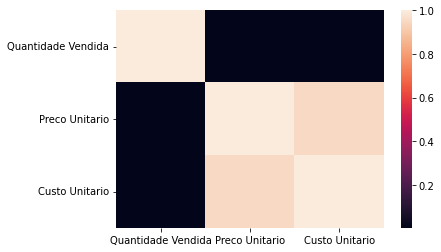

In [165]:
# Checando a correlacao e redundancia dos dados
sns.heatmap(df_vendas.corr());

In [166]:
# Renomeando colunas

df_vendas = df_vendas.rename(columns = {
  "Quantidade Vendida" : "Quantidade" , 
  "Data da Venda" : "Data_venda" ,
  "Preco Unitario" : "Preco_unitario" ,
  "Custo Unitario" : "Custo_unitario"
})
df_vendas.head()

,Produto,Quantidade,Loja,Data_venda,Preco_unitario,Custo_unitario,Marca,Categoria
0,Moto G7,4,São Paulo,"segunda-feira, 1 de fevereiro de 2016",1400,750,Motorola,Celular
1,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400,750,Motorola,Celular
2,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400,750,Motorola,Celular
3,Moto G7,4,São Paulo,"terça-feira, 23 de fevereiro de 2016",1400,750,Motorola,Celular
4,Moto G7,4,São Paulo,"terça-feira, 15 de março de 2016",1400,750,Motorola,Celular


In [167]:
#Reestruturando os tipos de dados

datatypes_per_column = {
      "Produto" : "string" , 
      "Quantidade" : "int" , 
      "Loja" : "string" , 
      "Preco_unitario" : "float" ,
      "Custo_unitario" : "float" , 
      "Marca" : "string" , 
      "Categoria" : "string"
       } # Aqui nao ireir redefinir a data pois ja esta em um padrao aceito pelo PBi, a paltaforma utilizada para visualizacao
df_vendas = df_vendas.astype(datatypes_per_column)
df_vendas.head()

,Produto,Quantidade,Loja,Data_venda,Preco_unitario,Custo_unitario,Marca,Categoria
0,Moto G7,4,São Paulo,"segunda-feira, 1 de fevereiro de 2016",1400.0,750.0,Motorola,Celular
1,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400.0,750.0,Motorola,Celular
2,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400.0,750.0,Motorola,Celular
3,Moto G7,4,São Paulo,"terça-feira, 23 de fevereiro de 2016",1400.0,750.0,Motorola,Celular
4,Moto G7,4,São Paulo,"terça-feira, 15 de março de 2016",1400.0,750.0,Motorola,Celular


In [168]:
# Informaçoes gerais da companhia

QntCategorias = df_vendas['Categoria'].unique()
QntLojas = df_vendas['Loja'].unique()
QntMarca = df_vendas['Marca'].unique()

print("Unidades no Brasil: " , QntLojas , "\n");
print("Categorias negociadas: " , QntCategorias , "\n");
print("Marcas Parceiras: " , QntMarca);

Unidades no Brasil:  <StringArray>
[     'São Paulo', 'Rio de Janeiro',      'Fortaleza',       'Salvador',
 'Belo Horizonte',       'Curitiba',      'Guarulhos',   'Porto Alegre',
    'Nova Iguaçu',         'Recife',        'Niterói',       'Campinas',
        'Goiânia']
Length: 13, dtype: string 

Categorias negociadas:  <StringArray>
['Celular', 'Televisão', 'Notebook', 'Smart Watch', 'Tablet', 'Câmera']
Length: 6, dtype: string 

Marcas Parceiras:  <StringArray>
['Motorola',    'Apple',  'Samsung',   'Philco',       'LG',     'Acer',
     'Dell',    'Nikon',   'Xiaomi',     'Sony',    'Canon']
Length: 11, dtype: string


In [169]:
display(df_vendas.describe())

,Quantidade,Preco_unitario,Custo_unitario
count,23794.000000,23794.000000,23794.000000
mean,3.002522,2192.426662,1181.503740
std,1.412606,1343.309310,738.306758
min,1.000000,700.000000,300.000000
25%,2.000000,1400.000000,650.000000
50%,3.000000,1900.000000,1100.000000
75%,4.000000,2600.000000,1400.000000
max,5.000000,6500.000000,3500.000000


# Analise de rendimento
Aqui identificamos o rendimento geral de cada unidade.

> O nosso DataFrame nao possui dados de lucro entao vamos calcular o lucro obtido sobre os produtos.
 

> Vamos descobrir quanto cada unidade esta rendendo


> Por fim vamos descobrir o rendimento geral por ano em cada unidade


In [170]:
# Faturamento dem cada venda
df_vendas['Faturamento'] = df_vendas['Quantidade'] * df_vendas['Preco_unitario']

# Custo total para se obter o faturamento
df_vendas['Custo_venda'] = df_vendas['Quantidade'] * df_vendas['Custo_unitario']

# Lucro Bruto
df_vendas['Lucro'] = (df_vendas['Faturamento'] - df_vendas['Custo_venda'] )

display(df_vendas)

,Produto,Quantidade,Loja,Data_venda,Preco_unitario,Custo_unitario,Marca,Categoria,Faturamento,Custo_venda,Lucro
0,Moto G7,4,São Paulo,"segunda-feira, 1 de fevereiro de 2016",1400.0,750.0,Motorola,Celular,5600.0,3000.0,2600.0
1,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400.0,750.0,Motorola,Celular,5600.0,3000.0,2600.0
2,Moto G7,4,São Paulo,"terça-feira, 2 de fevereiro de 2016",1400.0,750.0,Motorola,Celular,5600.0,3000.0,2600.0
3,Moto G7,4,São Paulo,"terça-feira, 23 de fevereiro de 2016",1400.0,750.0,Motorola,Celular,5600.0,3000.0,2600.0
4,Moto G7,4,São Paulo,"terça-feira, 15 de março de 2016",1400.0,750.0,Motorola,Celular,5600.0,3000.0,2600.0
...,...,...,...,...,...,...,...,...,...,...,...
23789,Moto G7,1,Rio de Janeiro,"segunda-feira, 17 de dezembro de 2018",1400.0,750.0,Motorola,Celular,1400.0,750.0,650.0
23790,Moto G7,1,Niterói,"domingo, 23 de dezembro de 2018",1400.0,750.0,Motorola,Celular,1400.0,750.0,650.0
23791,Moto G7,1,Curitiba,"sexta-feira, 28 de dezembro de 2018",1400.0,750.0,Motorola,Celular,1400.0,750.0,650.0
23792,Moto G7,1,Campinas,"domingo, 30 de dezembro de 2018",1400.0,750.0,Motorola,Celular,1400.0,750.0,650.0


In [171]:
# Media de lucro
print(df_vendas['Lucro'].mean())

3038.816508363453


In [172]:
# Ranking de vendas feito por cada unidade no periodo total 2016 a 2018 
Vendas_Loja = df_vendas['Loja'].value_counts()
display(Vendas_Loja)

São Paulo         5412
Rio de Janeiro    2825
Recife            2326
Fortaleza         2289
Salvador          2266
Belo Horizonte    1598
Curitiba          1472
Guarulhos         1228
Porto Alegre      1225
Goiânia           1062
Campinas           922
Nova Iguaçu        733
Niterói            436
Name: Loja, dtype: Int64

In [173]:
# Ranking das unidades que mais produziram recita 2016 a 2018
Resultados_Loja = df_vendas[['Loja' , 'Faturamento' , 'Lucro']].groupby('Loja').sum()
display(Resultados_Loja)

,Faturamento,Lucro
Loja,,
Belo Horizonte,10408650.0,4854050.0
Campinas,5905600.0,2752850.0
Curitiba,9547750.0,4417900.0
Fortaleza,15064750.0,6954900.0
Goiânia,7063700.0,3276050.0
Guarulhos,8091650.0,3722800.0
Niterói,2913600.0,1330050.0
Nova Iguaçu,4674750.0,2113450.0
Porto Alegre,7895050.0,3637350.0


In [174]:
# Ranking dos setores que mais produziram receita 2016 a 20218
Resultados_Categoria = df_vendas[['Categoria' , 'Faturamento' , 'Lucro']].groupby('Categoria').sum()
display(Resultados_Categoria)

,Faturamento,Lucro
Categoria,,
Celular,59642100.0,29450750.0
Câmera,18320400.0,9141650.0
Notebook,34669200.0,17195350.0
Smart Watch,6857950.0,3210850.0
Tablet,1547250.0,720200.0
Televisão,35728800.0,12586800.0


In [175]:
# Ranking das marcas parceiras que mais contribuiram na receita 2016 a 2018
Resultados_Marca = df_vendas[['Marca' , 'Faturamento' , 'Lucro']].groupby('Marca').sum()
display(Resultados_Marca)

,Faturamento,Lucro
Marca,,
Acer,7572000.0,3943750.0
Apple,29987250.0,15359850.0
Canon,8803500.0,3814850.0
Dell,21133200.0,9474400.0
LG,20181200.0,6985800.0
Motorola,10510200.0,5198550.0
Nikon,4836000.0,2652000.0
Philco,9436000.0,3538500.0
Samsung,34647850.0,16381700.0


Vemos que nossas datas estão com o identificador semanal. Ao invez de tratar esses dados eliminando o dia da semana vou mante-lo, pois pode contribuir para prever os melhores dias onde cada loja deve fazer um saldão no futuro.

Entao, para lidar com esses dados de data vamos utilizar o SQL dentro do scrip em python com a biblioteca 'pandasql'. O SQL ira nos evitar embrolios tecnicos alem de poupar boas linhas de codigo 😄.
A 'pandasql' usa o formato 'sqlite'. 

In [176]:
#instalando o pandasql
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [177]:
from pandasql import sqldf

In [178]:
# 2016
query_lucroLoja2016 = sqldf("SELECT Loja , Data_venda , Faturamento, Lucro FROM df_vendas WHERE Data_venda LIKE '%2016%'")
display(query_lucroLoja2016)

,Loja,Data_venda,Faturamento,Lucro
0,São Paulo,"segunda-feira, 1 de fevereiro de 2016",5600.0,2600.0
1,São Paulo,"terça-feira, 2 de fevereiro de 2016",5600.0,2600.0
2,São Paulo,"terça-feira, 2 de fevereiro de 2016",5600.0,2600.0
3,São Paulo,"terça-feira, 23 de fevereiro de 2016",5600.0,2600.0
4,São Paulo,"terça-feira, 15 de março de 2016",5600.0,2600.0
...,...,...,...,...
6038,Belo Horizonte,"segunda-feira, 19 de dezembro de 2016",1400.0,650.0
6039,Recife,"quarta-feira, 21 de dezembro de 2016",1400.0,650.0
6040,Curitiba,"domingo, 25 de dezembro de 2016",1400.0,650.0
6041,Salvador,"domingo, 25 de dezembro de 2016",1400.0,650.0


In [179]:
# 2017
query_lucroLoja2017 = sqldf("SELECT Loja , Data_venda , Faturamento, Lucro FROM df_vendas WHERE Data_venda LIKE '%2017%'")
display(query_lucroLoja2017)

,Loja,Data_venda,Faturamento,Lucro
0,São Paulo,"sexta-feira, 13 de janeiro de 2017",5600.0,2600.0
1,São Paulo,"terça-feira, 24 de janeiro de 2017",5600.0,2600.0
2,São Paulo,"sábado, 28 de janeiro de 2017",5600.0,2600.0
3,São Paulo,"segunda-feira, 30 de janeiro de 2017",5600.0,2600.0
4,São Paulo,"quarta-feira, 22 de fevereiro de 2017",5600.0,2600.0
...,...,...,...,...
7748,Salvador,"quarta-feira, 13 de dezembro de 2017",1400.0,650.0
7749,Nova Iguaçu,"sexta-feira, 15 de dezembro de 2017",1400.0,650.0
7750,Salvador,"sábado, 23 de dezembro de 2017",1400.0,650.0
7751,Belo Horizonte,"sexta-feira, 29 de dezembro de 2017",1400.0,650.0


In [180]:
# 2018
query_lucroLoja2018 = sqldf("SELECT Loja , Data_venda , Faturamento, Lucro FROM df_vendas WHERE Data_venda LIKE '%2018%'")
display(query_lucroLoja2018)

,Loja,Data_venda,Faturamento,Lucro
0,São Paulo,"segunda-feira, 1 de janeiro de 2018",5600.0,2600.0
1,São Paulo,"sábado, 6 de janeiro de 2018",5600.0,2600.0
2,São Paulo,"terça-feira, 9 de janeiro de 2018",5600.0,2600.0
3,São Paulo,"terça-feira, 9 de janeiro de 2018",5600.0,2600.0
4,São Paulo,"segunda-feira, 15 de janeiro de 2018",5600.0,2600.0
...,...,...,...,...
9993,Rio de Janeiro,"segunda-feira, 17 de dezembro de 2018",1400.0,650.0
9994,Niterói,"domingo, 23 de dezembro de 2018",1400.0,650.0
9995,Curitiba,"sexta-feira, 28 de dezembro de 2018",1400.0,650.0
9996,Campinas,"domingo, 30 de dezembro de 2018",1400.0,650.0


In [181]:
# Quantitativos Anuais

#2016
lucroLojas2016= query_lucroLoja2016[['Loja' , 'Faturamento' , 'Lucro']].groupby('Loja').sum()
#2017
lucroLojas2017 = query_lucroLoja2017[['Loja' , 'Faturamento' , 'Lucro']].groupby('Loja').sum()
#2018
lucroLojas2018 = query_lucroLoja2018[['Loja' , 'Faturamento' , 'Lucro']].groupby('Loja').sum()

display(lucroLojas2018)

,Faturamento,Lucro
Loja,,
Belo Horizonte,4492700.0,2113900.0
Campinas,2200600.0,1033350.0
Curitiba,4032500.0,1852100.0
Fortaleza,6411100.0,2933000.0
Goiânia,3084550.0,1425050.0
Guarulhos,3512250.0,1615900.0
Niterói,1250900.0,579550.0
Nova Iguaçu,2053050.0,952700.0
Porto Alegre,3368600.0,1538150.0


In [182]:
# DataFrame dos gestores responsaveis
dadosGerencia = {
   'Cidade' : ['Belo Horizonte' ,'Campinas' , 'Curitiba' ,'Fortaleza' , 'Goiânia' ,'Guarulhos' ,'Niterói' , 'Nova Iguaçu' , 'Porto Alegre', 'Recife' , 'Rio de Janeiro' ,'Salvador' ,'São Paulo'] , 
   'UF' : ['MG','SP','PR','CE','GO','SP','RJ','RJ','RS','PE','RJ','BA','SP'] , 
   'Unidade' : ['BH Shopping','Parque D. Pedro Shopping','Shopping Curitiba','Iguatemi Bosque','Passeio das Águas Shopping','Internacional Shopping','Shopping Plaza','Shopping Nova Iguaçu','Barra Shopping Sul','Shopping RioMar','Casa Shopping','Salvador Shopping','Shopping Cidade São Paulo'] ,
   'Gestor_Unidade' : ['Benedito Passos','Eloísa Alvarez','Murilo Silveira','Sônia Duarte','Tatiana Gomes','Roberto Quadros','Carlos Hamada','Teodoro Bitencourt','Edson Paz','Lucas Damasceno','Marli Bitencourt','Mauro Andrade','Carla Esteves'],
}
df_Gerencia = pd.DataFrame(dadosGerencia)
display(df_Gerencia)

,Cidade,UF,Unidade,Gestor_Unidade
0,Belo Horizonte,MG,BH Shopping,Benedito Passos
1,Campinas,SP,Parque D. Pedro Shopping,Eloísa Alvarez
2,Curitiba,PR,Shopping Curitiba,Murilo Silveira
3,Fortaleza,CE,Iguatemi Bosque,Sônia Duarte
4,Goiânia,GO,Passeio das Águas Shopping,Tatiana Gomes
5,Guarulhos,SP,Internacional Shopping,Roberto Quadros
6,Niterói,RJ,Shopping Plaza,Carlos Hamada
7,Nova Iguaçu,RJ,Shopping Nova Iguaçu,Teodoro Bitencourt
8,Porto Alegre,RS,Barra Shopping Sul,Edson Paz
9,Recife,PE,Shopping RioMar,Lucas Damasceno


Aqui criei um data frame com nomes ficticios para analisarmos qual gestor fez um melhor trabalho durante esses 3 anos.

# Exportando os dados

Agora que ja condensamos os dados que precisamos, vamos exportalos para fazer a analize dentro do Power Bi

In [183]:
#Relatorio Geral condensado
df_vendas.to_excel('VendasGeral.xlsx')

#Relacao de gestores
df_Gerencia.to_excel('Gerencia.xlsx')
#Resultados Nascionais do periodo
Resultados_Loja.to_excel('ResultadosGeral.xlsx')
Resultados_Categoria.to_excel('CategoriasGeral.xlsx')
Resultados_Marca.to_excel('MarcasGeral.xlsx')

#Resultados Regionais por ano
lucroLojas2016.to_excel('Lucro2016.xlsx')
lucroLojas2017.to_excel('Lucro2017.xlsx')
lucroLojas2018.to_excel('Lucro2018.xlsx')